# Лабораторная работа 3.5 Визуализация данных с помощью matplotlib

## Линейный график

### Построение графика

In [17]:
from matplotlib import pylab as plt
%matplotlib inline

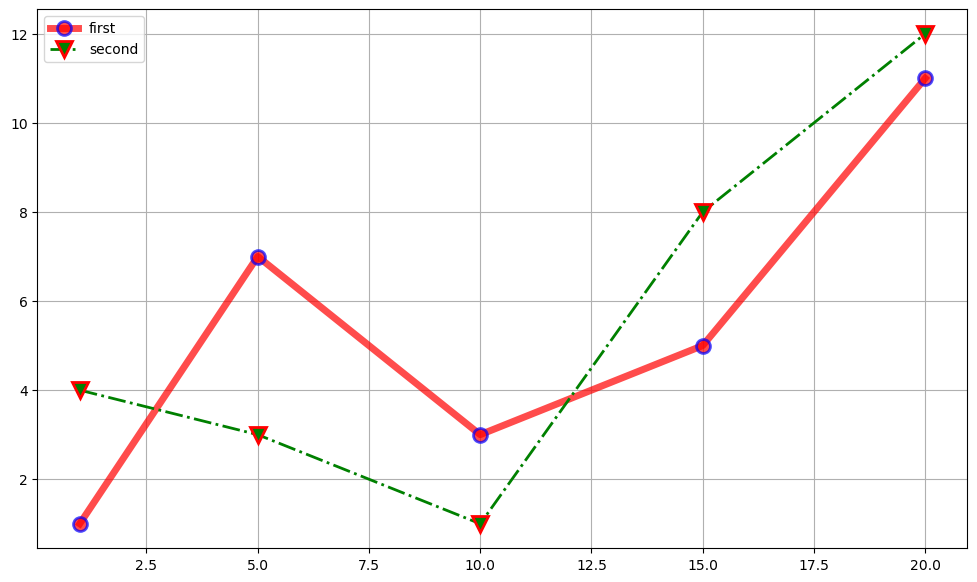

In [18]:
x = [1, 5, 10, 15, 20]
y1 = [1, 7, 3, 5, 11]
y2 = [4, 3, 1, 8, 12]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, y2, 'v-.g', label="second", mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)

### Заливка области между графиком и осью

Создадим набор данных для эксперимента:

In [19]:
import numpy as np


x = np.arange(0.0, 5, 0.01)
y = np.cos(x*np.pi)

Отобразим график с заливкой:

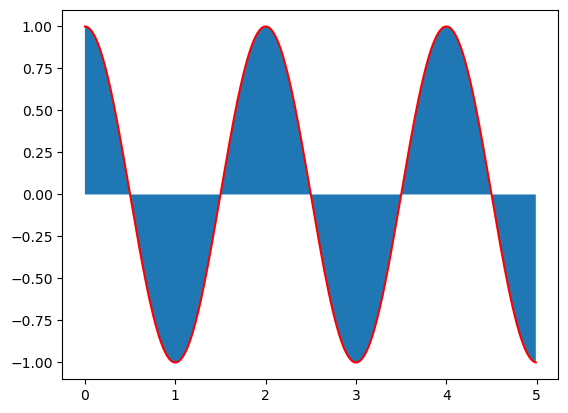

In [20]:
plt.plot(x, y, c = "r")
plt.fill_between(x, y)

Изменим правила заливки:

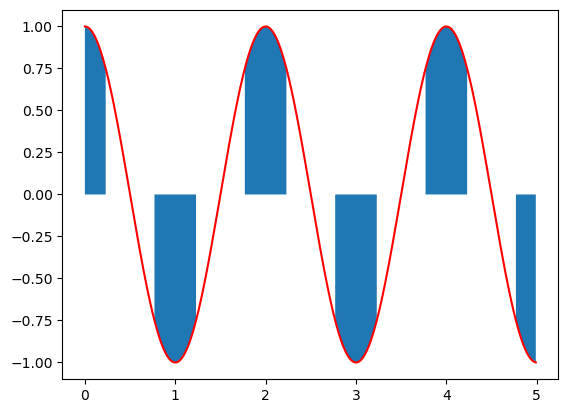

In [21]:
plt.plot(x, y, c="r")
plt.fill_between(x, y, where=(y > 0.75) | (y < -0.75))

Заливка области между 0 и y, при условии, что y >= 0:

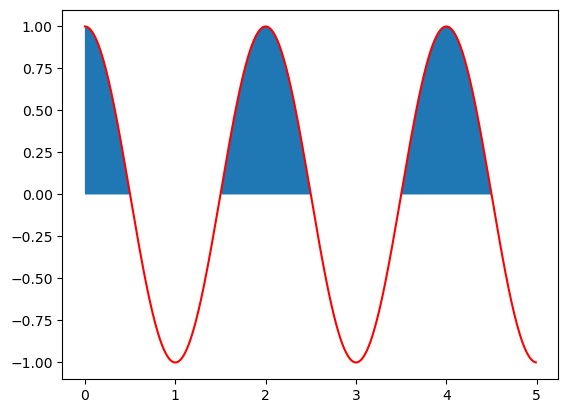

In [22]:
plt.plot(x, y, c="r")
plt.fill_between(x, y, where=(y > 0))

Заливка области между 0.5 и y, при условии, что y >= 0.5:

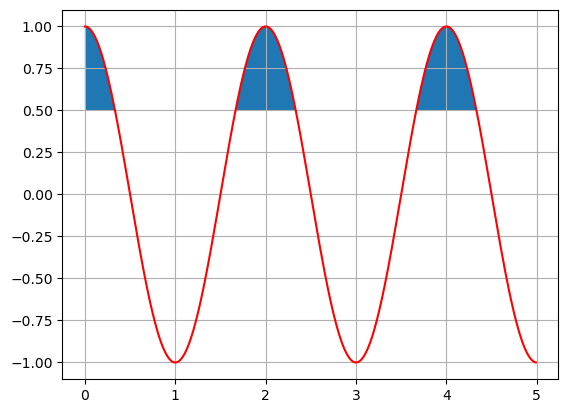

In [23]:
plt.plot(x, y, c="r")
plt.grid()

plt.fill_between(x, 0.5, y, where=(y>=0.5))

Заливка область между y и 1:

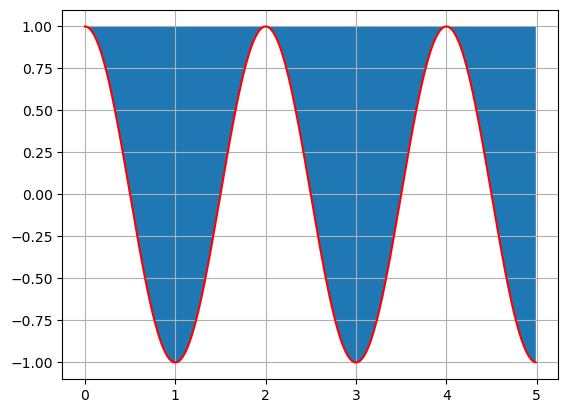

In [24]:
plt.plot(x, y, c="r")
plt.grid()

plt.fill_between(x, y, 1)

Вариант двухцветной заливки:

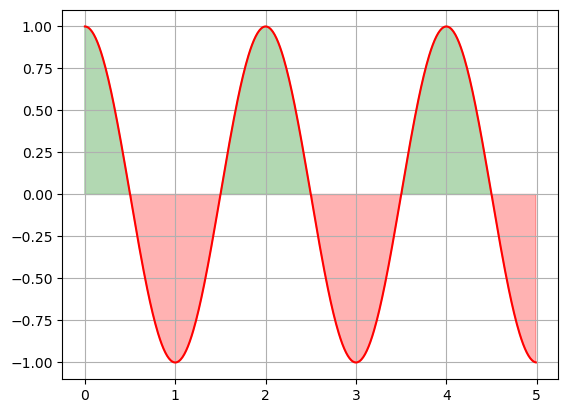

In [25]:
plt.plot(x, y, c="r")
plt.grid()

plt.fill_between(x, y, where=y>=0, color="g", alpha=0.3)
plt.fill_between(x, y, where=y<=0, color="r", alpha=0.3)

### Настройка маркировки графиков

В начале этого раздела мы приводили пример использования маркеров при отображенииграфиков. Сделаем это ещё раз, но уже в упрощенном виде:

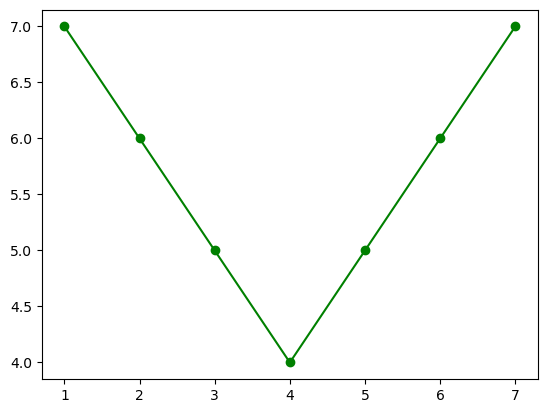

In [26]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [7, 6, 5, 4, 5, 6, 7]
plt.plot(x, y, marker="o", c="g")

В наборе данных, который создает код количество точек составляет 500, поэтому подход, представленный выше уже будет не применим.

Ниже представлен пример, демонстрирующий работу с markevery

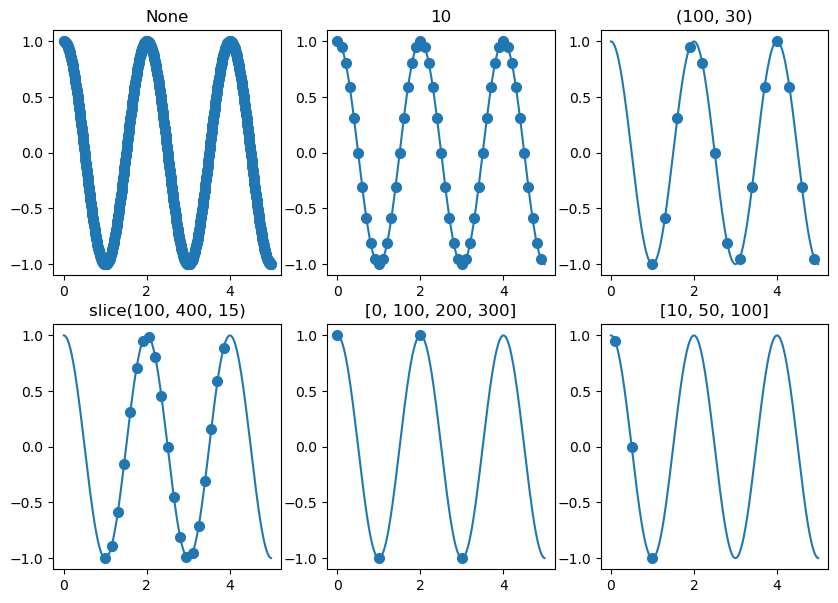

In [27]:
x = np.arange(0.0, 5, 0.01)

y = np.cos(x * np.pi)
m_ev_case = [None, 10, (100, 30), slice(100,400,15), [0, 100, 200, 300], [10,
50, 100]]

fig, ax = plt.subplots(2, 3, figsize=(10, 7))
axs = [ax[i, j] for i in range(2) for j in range(3)]

for i, case in enumerate(m_ev_case):
    axs[i].set_title(str(case))
    axs[i].plot(x, y, "o", ls='-', ms=7, markevery=case)

### Обрезка графика

Для того, чтобы отобразить только часть графика, которая отвечает определенному условию используйте предварительное маскирование данных с помощью функции masked_where из пакета numpy.

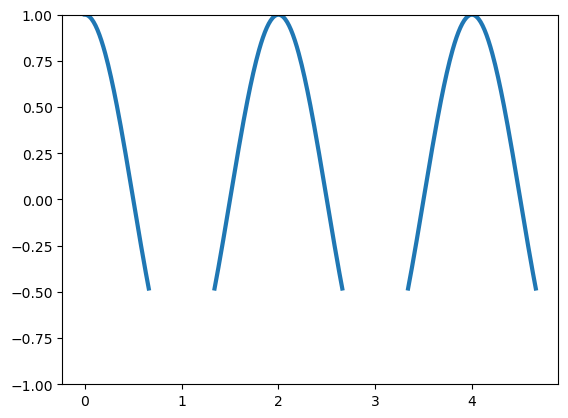

In [28]:
x = np.arange(0.0, 5, 0.01)
y = np.cos(x * np.pi)

y_masked = np.ma.masked_where(y < -0.5, y)
plt.ylim(-1, 1)

plt.plot(x, y_masked, linewidth=3)

### Ступенчатый график

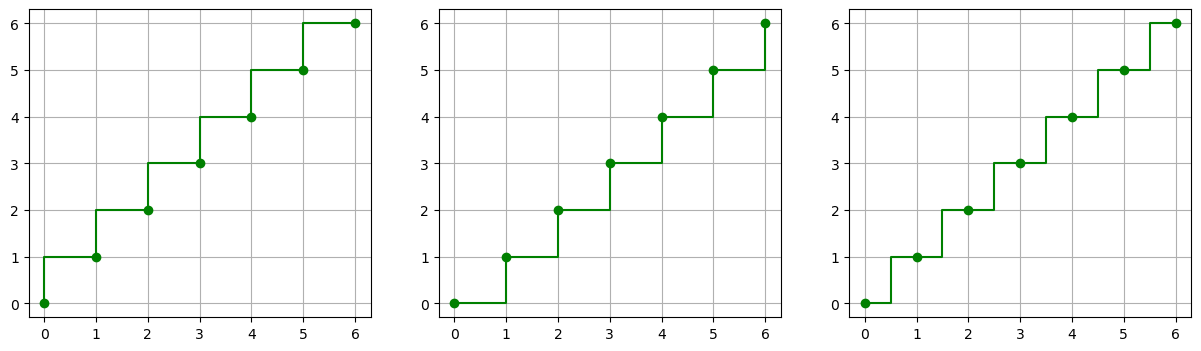

In [29]:
x = np.arange(0, 7)
y = x

where_set = ['pre', 'post', 'mid']
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for i, ax in enumerate(axs):
    ax.step(x, y, "g-o", where=where_set[i])
    ax.grid()

### Стековый график

Для построения стекового графика используется функция stackplot(). Суть его в том, что графики отображаются друг над другом, и каждый следующий является суммой предыдущего и заданного набора данных:

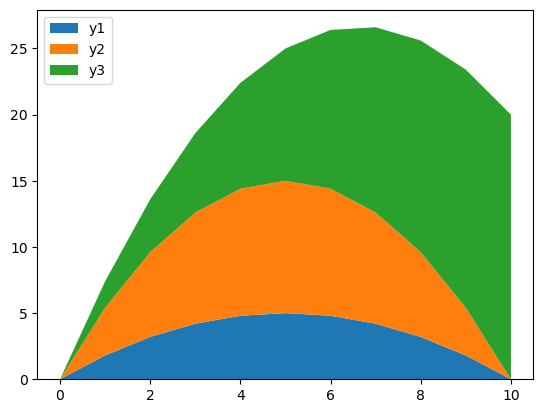

In [30]:
x = np.arange(0, 11, 1)

y1 = np.array([(-0.2)*i**2+2*i for i in x])
y2 = np.array([(-0.4)*i**2+4*i for i in x])
y3 = np.array([2*i for i in x])

labels = ["y1", "y2", "y3"]

fig, ax = plt.subplots()

ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')

### Stem-график

Визуально этот график выглядит как набор линий от точки с координатами (x, y) до базовой линии, в верхней точке ставится маркер:

<StemContainer object of 3 artists>

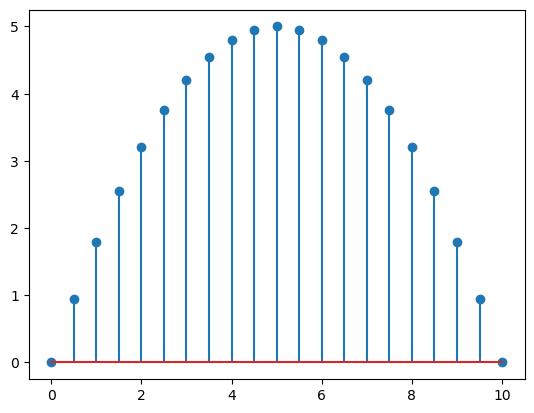

In [31]:
x = np.arange(0, 10.5, 0.5)
y = np.array([(-0.2)*i**2+2*i for i in x])

plt.stem(x, y)

Реализуем пример, демонстрирующий работу с дополнительными параметрами:

<StemContainer object of 3 artists>

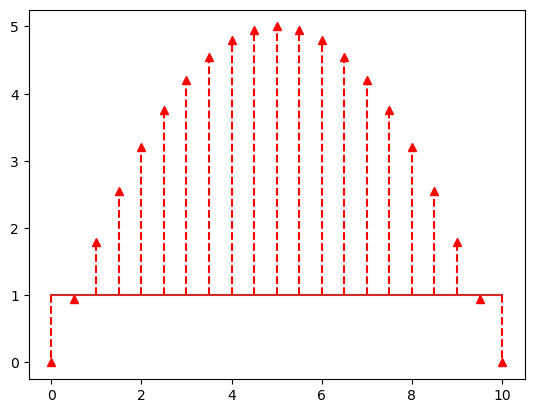

In [32]:
plt.stem(x, y, linefmt="r--", markerfmt="^", bottom=1)

### Точечный график


Для отображения точечного графика предназначена функция scatter(). В простейшем виде точечный график можно получить передав функции scatter() наборы точек для x, y координат:

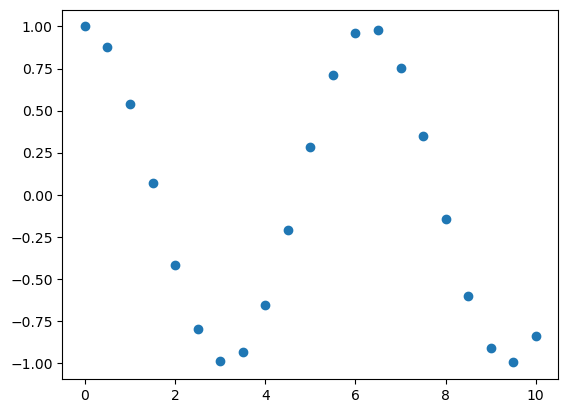

In [33]:
x = np.arange(0, 10.5, 0.5)
y = np.cos(x)

plt.scatter(x, y)

Создадим решение, использующее расширенные параметры для настройки отображения
графика:

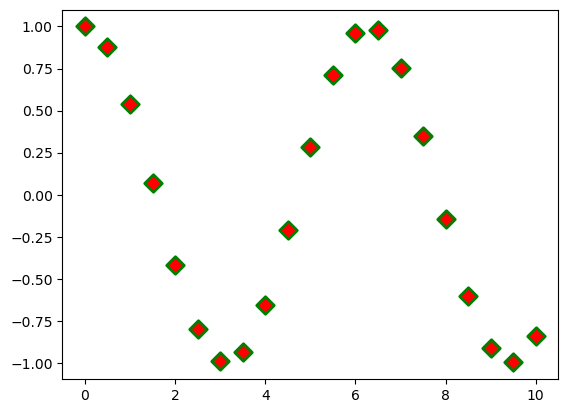

In [34]:
x = np.arange(0, 10.5, 0.5)
y = np.cos(x)

plt.scatter(x, y, s=80, c="r", marker="D", linewidths=2, edgecolors="g")

Пример, демонстрирующий работу с цветом и размером:

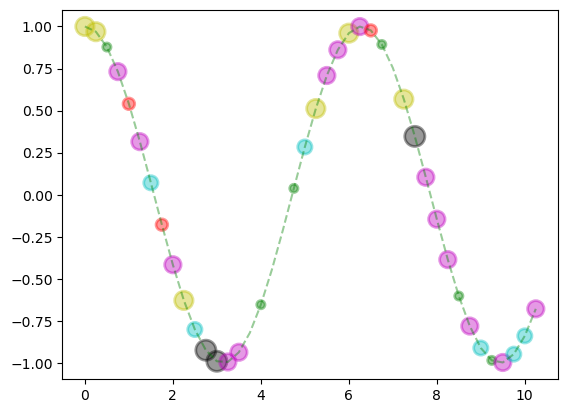

In [35]:
import matplotlib.colors as mcolors

bc = mcolors.BASE_COLORS

x = np.arange(0, 10.5, 0.25)
y = np.cos(x)

num_set = np.random.randint(1, len(mcolors.BASE_COLORS), len(x))
sizes = num_set * 35
colors = [list(bc.keys())[i] for i in num_set]

plt.scatter(x, y, s=sizes, alpha=0.4, c=colors, linewidths=2, edgecolors="face")

plt.plot(x, y, "g--", alpha=0.4)

### Столбчатые диаграммы

Построим простую диаграмму:

<BarContainer object of 7 artists>

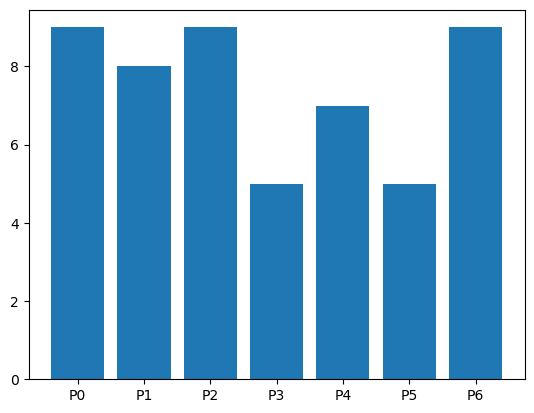

In [36]:
np.random.seed(123)

groups = [f"P{i}" for i in range(7)]
counts = np.random.randint(3, 10, len(groups))

plt.bar(groups, counts)

Если заменим bar() на barh() получим горизонтальную диаграмму:

<BarContainer object of 7 artists>

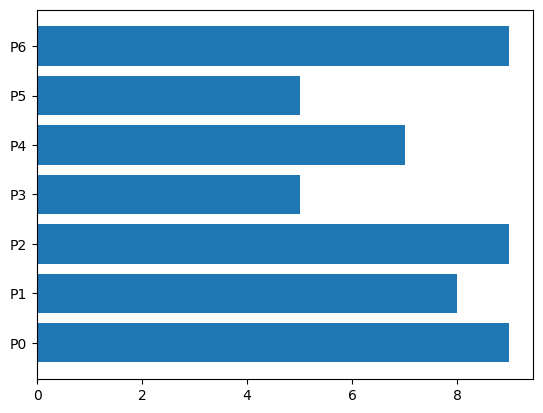

In [37]:
plt.barh(groups, counts)

Построим более сложный пример, демонстрирующий работу с параметрами:

<BarContainer object of 7 artists>

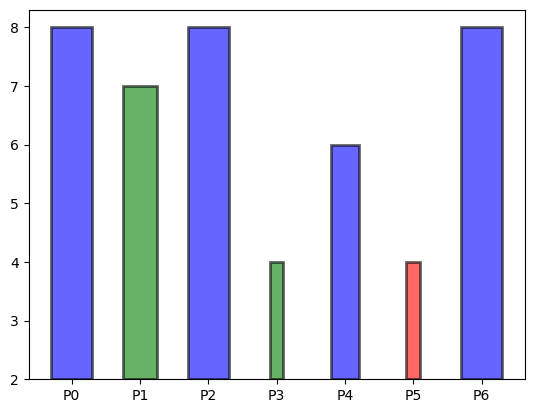

In [38]:
import matplotlib.colors as mcolors

bc = mcolors.BASE_COLORS

np.random.seed(123)

groups = [f"P{i}" for i in range(7)]
counts = np.random.randint(0, len(bc), len(groups))

width = counts*0.1

colors = [["r", "b", "g"][int(np.random.randint(0, 3, 1))] for _ in counts]
plt.bar(groups, counts, width=width, alpha=0.6, bottom=2, color=colors,
edgecolor="k", linewidth=2)

### Групповые столбчатые диаграммы

Используя определенным образом подготовленные данные можно строить групповые
диаграммы:

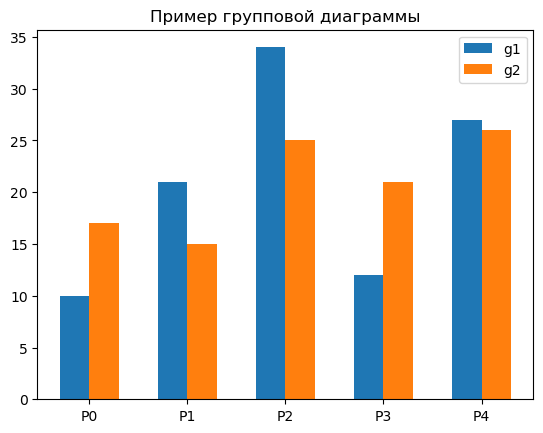

In [39]:
cat_par = [f"P{i}" for i in range(5)]

g1 = [10, 21, 34, 12, 27]
g2 = [17, 15, 25, 21, 26]

width = 0.3

x = np.arange(len(cat_par))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, g1, width, label='g1')
rects2 = ax.bar(x + width/2, g2, width, label='g2')

ax.set_title('Пример групповой диаграммы')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)

ax.legend()

### Диаграмма с errorbar элементом

Errorbar элемент позволяет задать величину ошибки для каждого элемента графика. Для этого используются параметры xerr, yerr и ecolor (для задания цвета)

<BarContainer object of 5 artists>

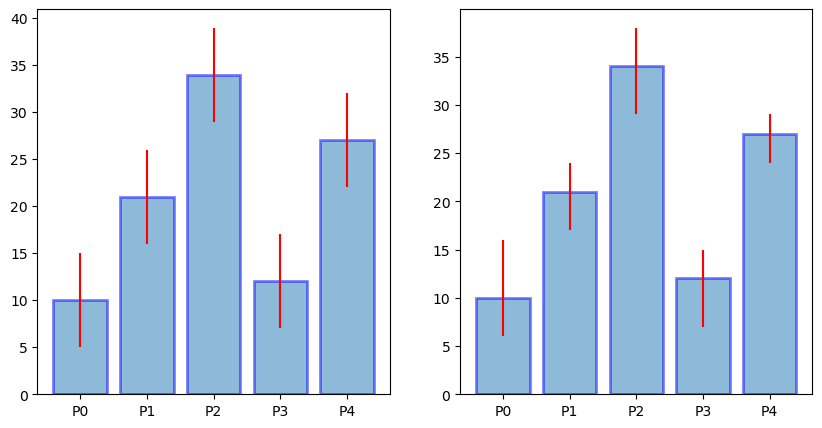

In [40]:
np.random.seed(123)

rnd = np.random.randint

cat_par = [f"P{i}" for i in range(5)]
g1 = [10, 21, 34, 12, 27]

error = np.array([[rnd(2,7),rnd(2,7)] for _ in range(len(cat_par))]).T
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(cat_par, g1, yerr=5, ecolor="r", alpha=0.5, edgecolor="b",
linewidth=2)
axs[1].bar(cat_par, g1, yerr=error, ecolor="r", alpha=0.5, edgecolor="b",
linewidth=2)

## Круговые диаграммы

### Классическая круговая диаграмма

Круговые диаграммы – это наглядный способ показать доли компонент в наборе. Они идеально подходят для отчетов, презентаций и т.п. Для построения круговых диаграмм в Matplotlib используется функция pie().

Пример построения диаграммы:

(-1.0999964134742897,
 1.0999998292130615,
 -1.0999996332200421,
 1.09999974471758)

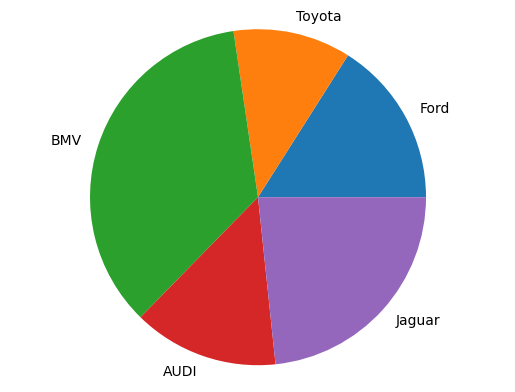

In [41]:
vals = [24, 17, 53, 21, 35]

labels = ["Ford", "Toyota", "BMV", "AUDI", "Jaguar"]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")

Создадим пример, в котором продемонстрируем работу с параметрами функции pie():


(-1.2541693468510096,
 1.1991449549931066,
 -1.1017808888721372,
 1.1374061134115763)

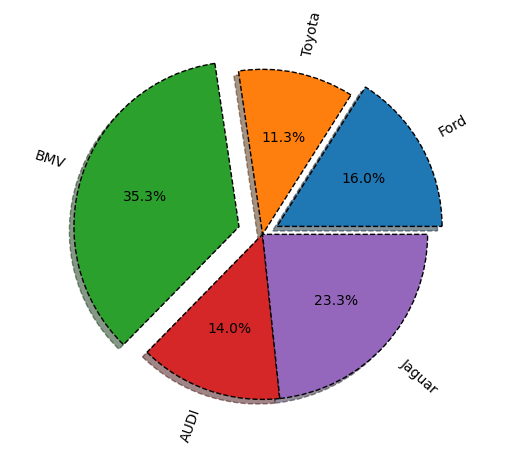

In [42]:
vals = [24, 17, 53, 21, 35]

labels = ["Ford", "Toyota", "BMV", "AUDI", "Jaguar"]
explode = (0.1, 0, 0.15, 0, 0)

fig, ax = plt.subplots()

ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,
wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)

ax.axis("equal")

### Вложенные круговые диаграммы

Рассмотрим пример построения вложенной круговой диаграммы. Такая диаграмма состоит из двух компонент: внутренняя ее часть является детальным представлением информации, а внешняя – суммарную по заданным областям. Каждая область представляет собой список численных значений, вместе они образуют общий набор данных.

([<matplotlib.patches.Wedge at 0x1ae6b12f100>,
 [Text(0.646314344414094, 0.13370777166859046, ''),
  Text(0.4521935266177387, 0.48075047008298655, ''),
  Text(0.040366679721656945, 0.6587643973138266, ''),
  Text(-0.34542288787409087, 0.5623904591409097, ''),
  Text(-0.6578039053946477, 0.05379611554331286, ''),
  Text(-0.48987451889717687, -0.44229283934431896, ''),
  Text(-0.12049606360635531, -0.6489073112975174, ''),
  Text(0.39011356818311405, -0.532363976917521, ''),
  Text(0.6332653697075483, -0.1859434632601054, '')])

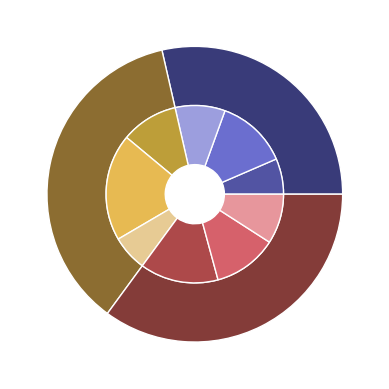

In [43]:
fig, ax = plt.subplots()

offset=0.4

data = np.array([[5, 10, 7], [8, 15, 5], [11, 9, 7]])
cmap = plt.get_cmap("tab20b")

b_colors = cmap(np.array([0, 8, 12]))
sm_colors = cmap(np.array([1, 2, 3, 9, 10, 11, 13, 14, 15]))

ax.pie(data.sum(axis=1), radius=1, colors=b_colors,
wedgeprops=dict(width=offset, edgecolor='w'))

ax.pie(data.flatten(), radius=1-offset, colors=sm_colors,
wedgeprops=dict(width=offset, edgecolor='w'))

### Круговая диаграмма в виде бублика

Построим круговую диаграмму в виде бублика (с отверстием посередине). Это можно сделать
через параметр wedgeprops, который отвечает за внешний вид долей:

([<matplotlib.patches.Wedge at 0x1ae6df91240>,
 [Text(0.9639373540021144, 0.5299290306818474, 'Ford'),
  Text(0.22870287165240302, 1.075962358309037, 'Toyota'),
  Text(-1.046162158377023, 0.3399187231970734, 'BMV'),
  Text(-0.3617533684721028, -1.0388139873909512, 'AUDI'),
  Text(0.8174592712713289, -0.7360437078139777, 'Jaguar')])

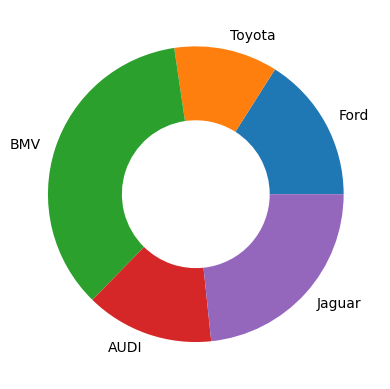

In [44]:
vals = [24, 17, 53, 21, 35]

labels = ["Ford", "Toyota", "BMV", "AUDI", "Jaguar"]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, wedgeprops=dict(width=0.5))

## Построение цветовой сетки

### Отображение изображений

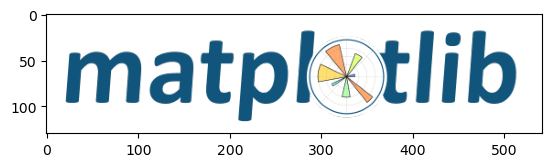

In [45]:
from PIL import Image
import requests

from io import BytesIO
response = requests.get('https://matplotlib.org/_static/logo2.png')
img = Image.open(BytesIO(response.content))

plt.imshow(img)

Создадим двумерный набор данных и отобразим его с помощью imshow():

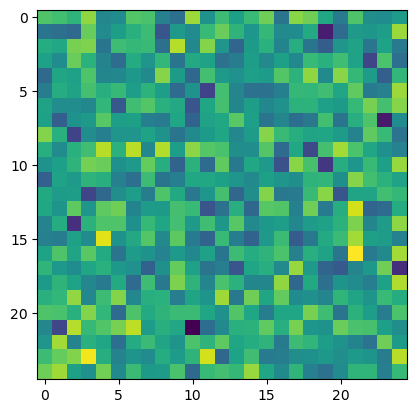

In [46]:
np.random.seed(19680801)

data = np.random.randn(25, 25)
plt.imshow(data)

Построим пример, использующий параметры:

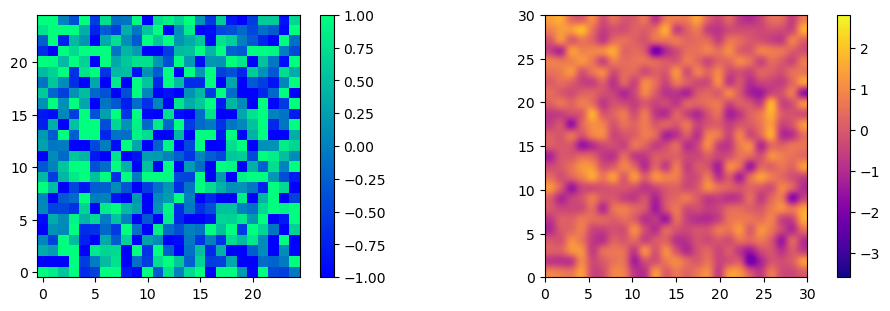

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(10,3), constrained_layout=True)

p1 = axs[0].imshow(data, cmap='winter', aspect='equal', vmin=-1, vmax=1,
origin="lower")
fig.colorbar(p1, ax=axs[0])

p2 = axs[1].imshow(data, cmap='plasma', aspect='equal',
interpolation='gaussian', origin="lower", extent=(0, 30, 0, 30))
fig.colorbar(p2, ax=axs[1])

### Отображение тепловой карты

Пример использования функции pcolormesh():

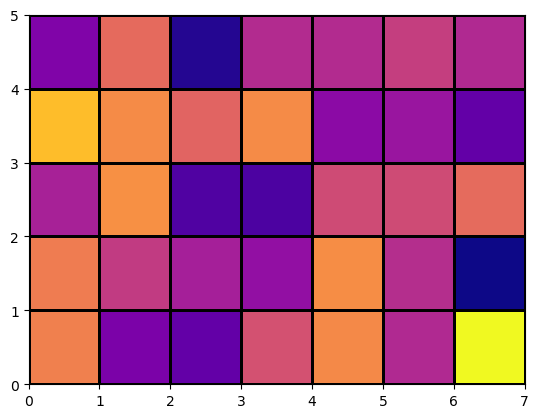

In [49]:
np.random.seed(123)

data = np.random.rand(5, 7)
plt.pcolormesh(data, cmap='plasma', edgecolors="k", shading='flat')